<a href="https://colab.research.google.com/github/vinthegreat84/PFE-Lab/blob/main/Volve_Field_Production_Data_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim is to perform Exploratory Data Analysis (EDA) on publicly available Well-Production data of Volve Field.

The dataset has data of 7 wells (producer wells and injector wells). See the image above for reference and a better understanding of the concept of Injector well and producer well.

This production data Analysis will involve the following steps

Ask

Prepare

Process

Analyze

Share

Act

1) ASK PHASE : (Asking SMART Questions)

Business Task:
To analyze the Well production data of producer wells of Volve field to gain insights about differences between the producer wells and to help the petroleum management team in identifying the wells having significant production as well as to find those wells that are might be on the path to being dry.

Key Stakeholders:
Primary stakeholder : The Production Manager

Other stakeholders: Sales Marketing Team

Deliverables : The report including summary to be made available within one week time

The Analysis will include

A description of all data sources used
Documentation of any cleaning or manipulation of data
A summary of my analysis
Supporting visualizations and key findings
recommendations based on my analysis

In [ ]:
# first let us import libraries that we are going to use in our Analysis
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

(2) Prepare Phase

(A) Data Location

The data used is a public data which is available at https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html The data has been made publicly available by Equinor under this license click here

In [ ]:
# to load data from excel file to our pandas dataframe
df_production = pd.read_excel('Volve production data.xlsx')

In [ ]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [ ]:
df_production.tail(10)
#df_production.describe()
#if we want we can also run describe() function to get details

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
15624 2016-09-09  NO 15/9-F-5 AH                5769           15/9-F-5   
15625 2016-09-10  NO 15/9-F-5 AH                5769           15/9-F-5   
15626 2016-09-11  NO 15/9-F-5 AH                5769           15/9-F-5   
15627 2016-09-12  NO 15/9-F-5 AH                5769           15/9-F-5   
15628 2016-09-13  NO 15/9-F-5 AH                5769           15/9-F-5   
15629 2016-09-14  NO 15/9-F-5 AH                5769           15/9-F-5   
15630 2016-09-15  NO 15/9-F-5 AH                5769           15/9-F-5   
15631 2016-09-16  NO 15/9-F-5 AH                5769           15/9-F-5   
15632 2016-09-17  NO 15/9-F-5 AH                5769           15/9-F-5   
15633 2016-09-18  NO 15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
15624         3420717          VOLVE             369304    MÆRSK INSPIRER   
15625         3420717          VOLVE             369304    MÆRSK INSPIRER   
15626         3420717          VOLVE             369304    MÆRSK INSPIRER   
15627         3420717          VOLVE             369304    MÆRSK INSPIRER   
15628         3420717          VOLVE             369304    MÆRSK INSPIRER   
15629         3420717          VOLVE             369304    MÆRSK INSPIRER   
15630         3420717          VOLVE             369304    MÆRSK INSPIRER   
15631         3420717          VOLVE             369304    MÆRSK INSPIRER   
15632         3420717          VOLVE             369304    MÆRSK INSPIRER   
15633         3420717          VOLVE             369304    MÆRSK INSPIRER   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
15624            0.0                    NaN  ...              %    0.08545   
15625            0.0                    NaN  ...              %    0.08545   
15626            0.0                    NaN  ...              %    0.08690   
15627            0.0                    NaN  ...              %    0.08545   
15628            0.0                    NaN  ...              %    0.08545   
15629            0.0                    NaN  ...              %    0.07776   
15630            0.0                    NaN  ...              %    0.08545   
15631            0.0                    NaN  ...              %    0.08544   
15632            0.0                    NaN  ...              %    0.07497   
15633            0.0                    NaN  ...            NaN        NaN   

       AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
15624    0.22889       0.042725          0.0           0.0           0.0   
15625    0.22885       0.040175          0.0           0.0           0.0   
15626    0.22889       0.034520          0.0           0.0           0.0   
15627    0.22889       0.026415          0.0           0.0           0.0   
15628    0.22889       0.037410          0.0           0.0           0.0   
15629    0.22879       0.018620          0.0           0.0           0.0   
15630    0.22914       0.006310          0.0           0.0           0.0   
15631    0.22896       0.011810          0.0           0.0           0.0   
15632    0.22846       0.025760          0.0           0.0           0.0   
15633        NaN       0.000000          NaN           NaN           NaN   

       BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
15624          0.0  production         WI  
15625          0.0  production         WI  
15626          0.0  production         WI  
15627          0.0  production         WI  
15628          NaN  production         OP  
15629          NaN  production         OP  
15630          NaN  production         OP  
15631          NaN  production         OP  
15632          NaN  production         OP  
15633          0.0   injection         WI  

[10 rows x 24 columns]

As observed in the glimpse of dataframe , we have these useful columns for our study:

DATEPRD : this column contains date

NPD_WELL_BORE_CODE : This is the unique identifier for a well

BORE_OIL_VOL : Volumetric Data for Produced Oil

BORE_GAS_VOL : Volumetric Data for Produced Gas

WELL_TYPE : Type of well Injector or Producer (We will focus only on producer wells)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text major ticklabel objects>)

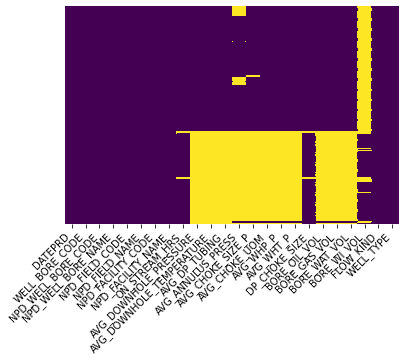

In [ ]:
#let us view a heatmap diagram of all the fields in dataframe, 
#The yellow color represents the null values
A= sns.heatmap(df_production.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation = 45, ha = 'right')

Let us perfrom a ROCCC analysis on our production data as follows:
RELIABLE: Yes the data is reliable as it is a public dataset.

ORIGINAL: Yes , the public data set is accecible to everyone to cross verify

COMPREHENSIVE: the data is useful for our case study. Although has missing data points. (we need to perform data imputation in the data cleaning phase)

CURRENT: NO, the data is old and as the Volve field was abandoned for production, this is the total dataset available

CITED:yes, This Volve Data set is one of its kind and Publicly available, so this dataSet is heavilily cited in almost all the significant Journals

(3) Process Phase
In this phase we perform data cleaning by imputation, There are many columns that are not useful to our Analysis and we can simply drop them.

In [ ]:
# to get the type of well available (either Injector WI or producer OP)
df_production['BORE_GAS_VOL'].sum()

1475370435.9399998

In [ ]:
df_production['BORE_OIL_VOL'].sum()

# this returns all the unique well codes, Here we see that there are total of 7 unique wells

10037080.610000001

In [ ]:
df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H']['BORE_OIL_VOL'].sum()

1147849.1

In [ ]:
df_production[df_production['WELL_TYPE'] == 'OP']['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-5 AH'], dtype=object)

In [ ]:
# initialize lists
WELL_BORE_CODE = ['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H','NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-5 AH']

BORE_OIL_VOL = [df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-1 C']['BORE_OIL_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H']['BORE_OIL_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-12 H']['BORE_OIL_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']['BORE_OIL_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-15 D']['BORE_OIL_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-5 AH']['BORE_OIL_VOL'].sum()]

BORE_GAS_VOL = [df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-1 C']['BORE_GAS_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H']['BORE_GAS_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-12 H']['BORE_GAS_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']['BORE_GAS_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-15 D']['BORE_GAS_VOL'].sum(),
                df_production[df_production['WELL_BORE_CODE'] == 'NO 15/9-F-5 AH']['BORE_GAS_VOL'].sum()]
  
# Create the pandas DataFrame
df = pd.DataFrame(list(zip(WELL_BORE_CODE, BORE_OIL_VOL, BORE_GAS_VOL)), columns=['WELL_BORE_CODE', 'BORE_OIL_VOL', 'BORE_GAS_VOL'])
df

WELL_BORE_CODE  BORE_OIL_VOL  BORE_GAS_VOL
0   NO 15/9-F-1 C     177709.33  2.644092e+07
1  NO 15/9-F-11 H    1147849.10  1.743105e+08
2  NO 15/9-F-12 H    4579609.55  6.675423e+08
3  NO 15/9-F-14 H    3942233.39  5.780095e+08
4  NO 15/9-F-15 D     148518.56  2.250535e+07
5  NO 15/9-F-5 AH      41160.68  6.561826e+06

In [ ]:
# Row information with maximum BORE_OIL_VOL
df.loc[df['BORE_OIL_VOL'].idxmax()]

WELL_BORE_CODE    NO 15/9-F-12 H
BORE_OIL_VOL          4579609.55
BORE_GAS_VOL        667542278.02
Name: 2, dtype: object

In [ ]:
# Well information with maximum BORE_OIL_VOL
df.loc[df['BORE_OIL_VOL'].idxmax()][0]

'NO 15/9-F-12 H'

In [ ]:
# Row information with maximum BORE_GAS_VOL
df.loc[df['BORE_GAS_VOL'].idxmax()]

WELL_BORE_CODE    NO 15/9-F-12 H
BORE_OIL_VOL          4579609.55
BORE_GAS_VOL        667542278.02
Name: 2, dtype: object

In [ ]:
# Well information with maximum BORE_GAS_VOL
df.loc[df['BORE_GAS_VOL'].idxmax()][0]

'NO 15/9-F-12 H'

In [ ]:
WELL_BORE_CODE = df_production['WELL_BORE_CODE'].unique().tolist()

In [ ]:
# def cumulative_reserve (WELL_BORE_CODE):
#   reserve = df_production[df_production['WELL_BORE_CODE'] == WELL_BORE_CODE]['BORE_OIL_VOL'].sum()
#   return reserve

# for i in WELL_BORE_CODE:
#   BORE_OIL_VOL = cumulative_reserve (WELL_BORE_CODE)
#   BORE_OIL_VOL.append(reserve)

# BORE_OIL_VOL  

In [ ]:
# let us filter only the producing well data which have well type as OP 
df_production[df_production['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5769])

In [ ]:
#let us create a filtered/cleaned dataframe and store only the data for producer type wells for our anaysis
df_filtered =df_production[df_production['WELL_TYPE'] == 'OP']

In [ ]:
# the dataframe has many columns that are not useful for our analysis
# droping all these column in our filtered dataframe as these are not useful for our study
df_filtered.drop(labels=['WELL_BORE_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_CODE',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
1     2014-04-08                7405            0.0                    NaN   
2     2014-04-09                7405            0.0                    NaN   
3     2014-04-10                7405            0.0                    NaN   
4     2014-04-11                7405            0.0              310.37614   
5     2014-04-12                7405            0.0              303.50078   
...          ...                 ...            ...                    ...   
15628 2016-09-13                5769            0.0                    NaN   
15629 2016-09-14                5769            0.0                    NaN   
15630 2016-09-15                5769            0.0                    NaN   
15631 2016-09-16                5769            0.0                    NaN   
15632 2016-09-17                5769            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
1                           NaN            NaN            0.00000   
2                           NaN            NaN            0.00000   
3                           NaN            NaN            0.00000   
4                      96.87589      277.27826            0.00000   
5                      96.92339      281.44744            0.00000   
...                         ...            ...                ...   
15628                       NaN            NaN            0.28463   
15629                       NaN            NaN            0.27272   
15630                       NaN            NaN            0.28686   
15631                       NaN            NaN            0.28604   
15632                       NaN            NaN            0.27212   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
1              1.003059    0.00000    0.00000        0.00000           0.0   
2              0.979008    0.00000    0.00000        0.00000           0.0   
3              0.545759    0.00000    0.00000        0.00000           0.0   
4              1.215987   33.09788   10.47992       33.07195           0.0   
5              3.087015   22.05334    8.70429       22.05334           0.0   
...                 ...        ...        ...            ...           ...   
15628          0.673718    0.08545    0.22889        0.03741           0.0   
15629          0.636088    0.07776    0.22879        0.01862           0.0   
15630          0.670794    0.08545    0.22914        0.00631           0.0   
15631          0.664393    0.08544    0.22896        0.01181           0.0   
15632          0.624660    0.07497    0.22846        0.02576           0.0   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
1               0.0           0.0          NaN  
2               0.0           0.0          NaN  
3               0.0           0.0          NaN  
4               0.0           0.0          NaN  
5               0.0           0.0          NaN  
...             ...           ...          ...  
15628           0.0           0.0          NaN  
15629           0.0           0.0          NaN  
15630           0.0           0.0          NaN  
15631           0.0           0.0          NaN  
15632           0.0           0.0          NaN  

[9143 rows x 15 columns]

Analyze Phase

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text major ticklabel objects>)

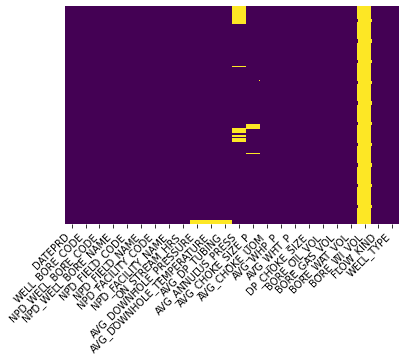

In [ ]:
# After droping unuseful columns, we can again plot a heatmap plot to visualize null data in our dataframe
sns.heatmap(df_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation = 45, ha = 'right')

As can be seen in the above heatmap, the column BORE_WI_VOL is yellow signifying null value, this is because we have taken only the producing wells, so there is no water injection from producing wells.

In [ ]:
df_filtered['NPD_WELL_BORE_CODE'].value_counts()
# counts number of data available for each well id

5599    3056
5351    3056
7078    1165
7289     978
7405     744
5769     144
Name: NPD_WELL_BORE_CODE, dtype: int64

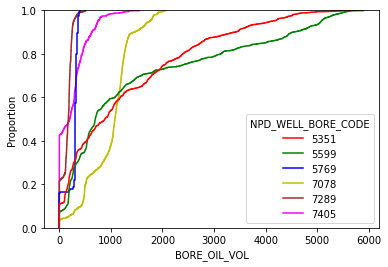

In [ ]:
#from the seaborn library , we can use the Empirical Cumulative Distribution Function , and plot the oil production from all those wells having code as producers 

sns.ecdfplot(x='BORE_OIL_VOL',data=df_filtered, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])

plt.show()

As seen in the above ECDF plot, we can see that for the well 7405, almost 40% data is zero Bore_OIL_VOL production and similarly for Well 7289, almost 20% data is zero Bore_OIL_VOL production. Similar case is with the well 5769. In All these three wells , the total Cumulative production is also significatly less compared to other producing wells. So let us ignore these three wells during our production prediction Machine learning model training

On the basis of ecdf plot,we might be tempted to erroneously concluded that the wells #7405 and #7289 were water injector wells because they have BORE_WAT_VOL (bore water volume ). This conclusion is wrong as the dataset clearly states all these 6 wells to be Oil Producer wells.
The correct conclusion will be achieved only when we integrate Petroleum Domain Knowledge with this Data Analysis. In any oil and/gas producing well, water is also produced mixed with crude. Till some economically feasible water cut ratio, the oil/gas production is viable , but as the water percentage increases, and it crosses the threshold for economic viability, the well is abandoned. Althogh the particular well is still a producing well, but it is producing more water than hydrocarbon fluid.

so in this case although both these wells are producer type but their oil production is not significant for consideration.

In [ ]:
## Another Scatter plot to show the oil production from these producer wells. Clearly the wells #7405, # 5769, #7289 production volume is insignificant
df_filtered["NPD_WELL_BORE_CODE"] = df_filtered["NPD_WELL_BORE_CODE"].astype(str)
fig = px.scatter(df_filtered, x="DATEPRD", y="BORE_OIL_VOL",
                 color="NPD_WELL_BORE_CODE",
                 hover_name="NPD_WELL_BORE_CODE")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fig = px.line(df_filtered, x="DATEPRD", y="BORE_OIL_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

The above interactive line plot of Oil production data , shows that the most significant production is coming from the two wells namely #5599 and #5351

Also in the above date wise production plot we clearly see that the well production value intermittently comes to zero value, which shows us that the well were regularly shut in. The same conclusion can also be verified from the on stream hours data available in the dataset.

The above plot shows a declining oil production value for all the significantly producing wells and for the insignificant wells , the production volume was very much insignificant and at the same time their water production volume increased making them not viable economically. The water volume can be seen in the plot below

In [ ]:
fig = px.line(df_filtered, x="DATEPRD", y="BORE_WAT_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [ ]:
fig = px.line(df_filtered, x="DATEPRD", y="BORE_GAS_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

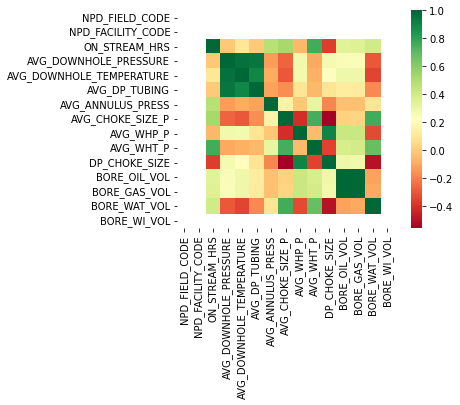

In [ ]:
#to find correlation between different types of data available to us
sns.heatmap(df_filtered.corr(),square=True,cmap='RdYlGn')

Share Phase
A summary of Production data Analysis done on the producing well data of Volve Field
Prepared by Imranul Haque Noor, Petroleum Engineer and a data analyst

Business Task:
To analyze the Well production data of producer wells of Volve field to gain insights about differences between the producer wells and to help the petroleum management team in identifying the wells having significant production as well as to find those wells that are might be on the path to being dry.

The data was available in xlsx format. After a preliminary glimpse of data it was observer that some of the columns were referring to the same data in with a different name , for example WELL_BORE_CODE''NPD_WELL_BORE_CODE' 'NPD_WELL_BORE_NAME

Similarly there were some columns that either had no useful data , or they were not relevant to our analysis . As a result a new filtered data frame was created and all the irrelevant columns were dropped.

As our study was specific to producing wells only, so the the data was filtered based on well_type and it was found that out of the 7 wells available, 6 were designated as OP or oil producer, so they were kept in the data.

For ease of analysis and classification, the NPD_WELL_BORE_CODE column was retained and other columns referring to wells by name were dropped.

A quick heatmap of the filterd data showed that there were no null values for OIL/GAS/Water Volume data available with us. At the same time the number of data points available for each row differed. A quick count of the available data gave the following result

Well_bore_code -----data available

5599 --------------- 3056

5351 --------------- 3056

7078--------------- 1165

7289--------------- 978

7405 --------------- 744

5769 --------------- 144

To understand the cumulative production from each of these wells , an Empirical Cumulative Distribution Function was utilised. The seaborn library has an ecdf plot function. The ecdf plots showed that in the well #7405, almost 40% data is zero Bore_OIL_VOL production and similarly for Well #7289, almost 20% data is zero Bore_OIL_VOL production. Similar case is with the well #5769. In All these three wells , the total Cumulative production is also significatly less compared to other producing wells.

on the basis of ecdf plot,we might be tempted to
erroneously conclude that the wells #7405 and #7289 were water injector wells because they have BORE_WAT_VOL (bore water volume ). This conclusion is wrong as the dataset clearly states all these 6 wells to be Oil Producer wells.
The correct conclusion will be achieved only when we integrate Petroleum Domain Knowledge with this Data Analysis. In any oil and/gas producing well, water is also produced mixed with crude. Upto some economically feasible water-cut ratio, the oil/gas production is viable , but as the water percentage increases, and it crosses the threshold for economic viability, and the well is abandoned. Although the particular well still might be a producing well, but it is producing more water than hydrocarbon fluid or it may had been a producer well it has achieved its decline phase and is on the verge of abandonment. The same conclusion can be verified from the Water production data of these wells.

so in this case although these wells are producer type but their oil production is not significant for consideration.
Further Scatter plot and line plot of the Production data shows that the most significant Oil production is coming from the two wells namely #5599 and #5351

Also in the date wise production plot we clearly see that the well production value intermittently comes to zero value, which shows us that the well were intermittently shut in. The same conclusion can also be verified from the on stream hours data available in the dataset.

In the correlation heatmap , we see a strong correlation between oil and gas production.

Act phase
Recommendation
The above plot shows a declining oil production value for all the significantly producing wells and for the insignificant wells ,the volume of Oil produced is very less and insignificant but at the same time their water production volume increased making them not viable economically.

As seen in the plots, the production from all the wells were declining and hence the wells were abandoned.